In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Exchange Rate Forecasting Project/Dataset/USD_JPY.csv")

In [4]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,02/28/2025,150.60,149.81,151.00,149.10,NaN,0.53%
1,02/27/2025,149.80,149.10,150.20,148.74,NaN,0.48%
2,02/26/2025,149.08,149.04,149.90,148.64,NaN,0.04%
3,02/25/2025,149.02,149.72,150.31,148.57,NaN,-0.46%
4,02/24/2025,149.71,149.39,149.89,148.85,NaN,0.28%
...,...,...,...,...,...,...,...
3951,01/07/2010,93.31,92.85,93.50,92.10,NaN,1.05%
3952,01/06/2010,92.34,92.02,92.70,91.52,NaN,0.68%
3953,01/05/2010,91.72,92.12,92.52,91.25,NaN,-0.90%
3954,01/04/2010,92.55,92.79,93.14,92.19,NaN,-0.48%


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').reset_index(drop=True)
df['Change %'] = df['Change %'].str.replace('%', '').astype(float)
df.drop(columns=['Vol.'], inplace=True)

In [6]:
df

,Date,Price,Open,High,Low,Change %
0,2010-01-01,93.00,93.01,93.05,92.98,0.11
1,2010-01-04,92.55,92.79,93.14,92.19,-0.48
2,2010-01-05,91.72,92.12,92.52,91.25,-0.90
3,2010-01-06,92.34,92.02,92.70,91.52,0.68
4,2010-01-07,93.31,92.85,93.50,92.10,1.05
...,...,...,...,...,...,...
3951,2025-02-24,149.71,149.39,149.89,148.85,0.28
3952,2025-02-25,149.02,149.72,150.31,148.57,-0.46
3953,2025-02-26,149.08,149.04,149.90,148.64,0.04
3954,2025-02-27,149.80,149.10,150.20,148.74,0.48


In [7]:
features = ['Price', 'Open', 'High', 'Low', 'Change %']
df[features].describe()

,Price,Open,High,Low,Change %
count,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000
mean,110.635437,110.635900,111.083228,110.154338,0.013953
std,20.529921,20.517085,20.610329,20.401516,0.577962
min,75.790000,75.910000,76.020000,75.570000,-3.780000
25%,100.167500,100.132500,100.590000,99.537500,-0.270000
50%,109.375000,109.400000,109.720000,109.030000,0.010000
75%,119.422500,119.440000,119.910000,118.827500,0.310000
max,161.680000,161.710000,162.010000,161.270000,3.540000


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3956 entries, 0 to 3955
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3956 non-null   datetime64[ns]
 1   Price     3956 non-null   float64       
 2   Open      3956 non-null   float64       
 3   High      3956 non-null   float64       
 4   Low       3956 non-null   float64       
 5   Change %  3956 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 185.6 KB
None


In [9]:
print(df.isnull().sum())

Date        0
Price       0
Open        0
High        0
Low         0
Change %    0
dtype: int64


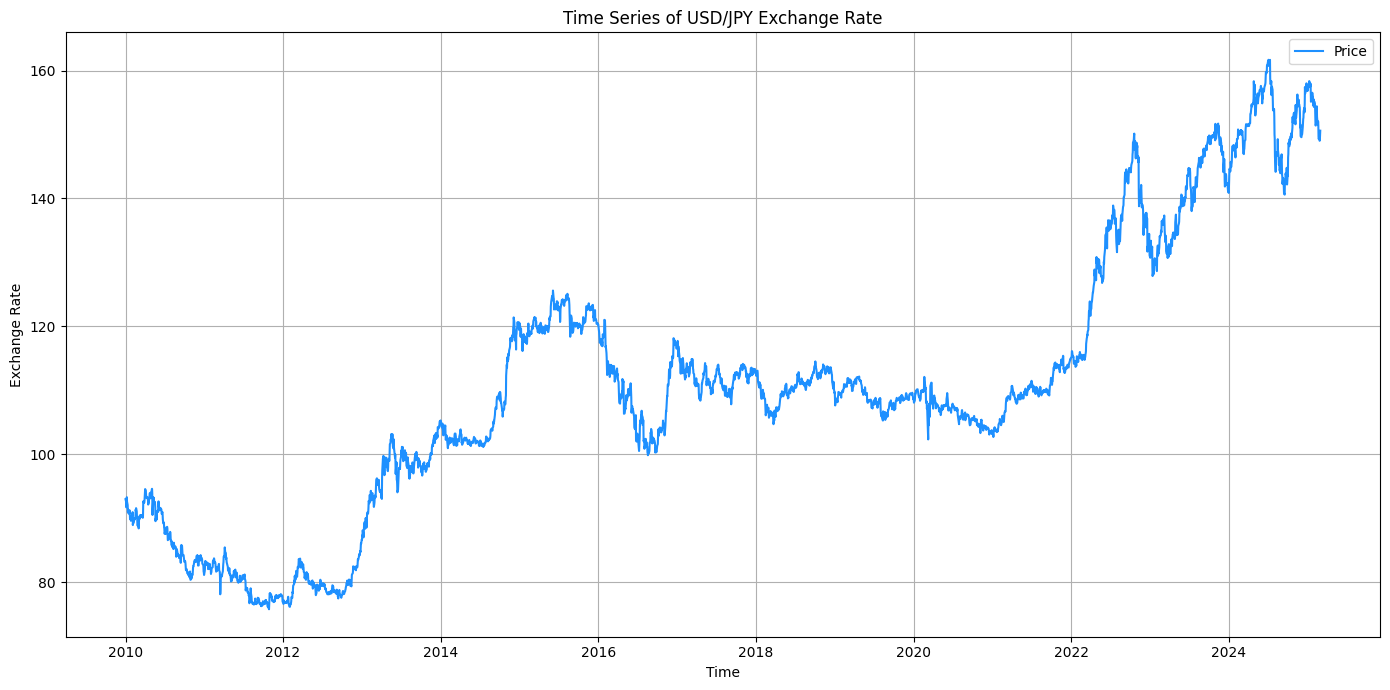

In [10]:
# Vẽ biểu đồ xu hướng giá theo thời gian
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Price'], label='Price', color='dodgerblue')
plt.title("Time Series of USD/JPY Exchange Rate")
plt.xlabel("Time")
plt.ylabel("Exchange Rate")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
train_size = int(0.8 * len(df))
train_df = df.iloc[:train_size].copy()
test_df = df.iloc[train_size:].copy()

In [ ]:
print(f" Train size: {train_df.shape}")
print(f" Test size: {test_df.shape}")

 Train size: (3164, 6)
 Test size: (792, 6)


In [ ]:
train_df.to_csv("/content/drive/MyDrive/Exchange Rate Forecasting Project/Train-Test Split Dataset/USD_JPY/train_data_USD_JPY.csv", index=False)
test_df.to_csv("/content/drive/MyDrive/Exchange Rate Forecasting Project/Train-Test Split Dataset/USD_JPY/test_data_USD_JPY.csv", index=False)
